### Assignment 1 Simple linear regression 
Predict delivery time using sorting time 

In [1]:
import pandas as pd 
import numpy as np

In [2]:
data = pd.read_csv("delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


#### so, with the help of this we'll get to know , there are no null values present in the data

#### Now we'll check the outliers from each atributes , so for that we need to import visualisation libraries

In [4]:
import matplotlib.pyplot as plt

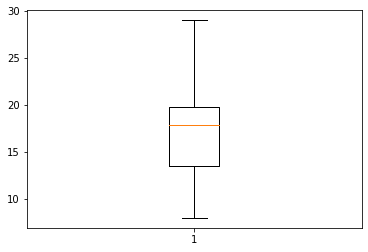

In [5]:
plt.boxplot(data['Delivery Time'])
plt.show()

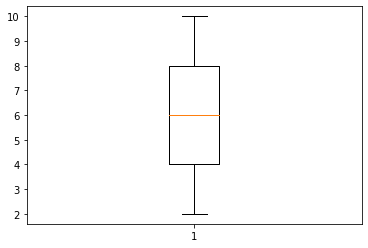

In [6]:
plt.boxplot(data['Sorting Time'])
plt.show()

In [7]:
import seaborn as sns

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

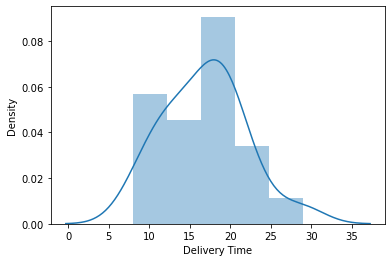

In [8]:
sns.distplot(data['Delivery Time'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

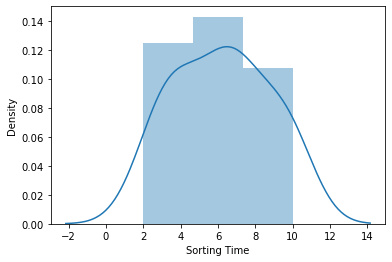

In [9]:
sns.distplot(data['Sorting Time'])

#### With this we'll get to know that the Data is Normally Distributed,there are no much outliers in the Sorting atribute on which we are going to perform our test 

### Now we'll check the corelation between Attributes

In [10]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


#### Hear we can say ,there is a strong relation between Delivery time and Sorting Time because r valuve is > 0.8

## Developing a Model -Trail 1
 


#### Develping a model using ols

In [12]:
import statsmodels.formula.api as smf

In [18]:
data = data.rename({'Delivery Time': 'DT','Sorting Time': 'ST'}, axis=1)

In [19]:
data.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [20]:
model1=smf.ols('DT~ST',data=data).fit()

In [21]:
model1.params

Intercept    6.582734
ST           1.649020
dtype: float64

#### These are the Parameters of the model 1 (Y = mX +c)

In [22]:
model1.rsquared 

0.6822714748417231

####  r squared value of model 1

In [23]:
model1.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 31 May 2021   Prob (F-statistic):           3.98e-06
Time:                        08:19:47   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ST', ylabel='DT'>

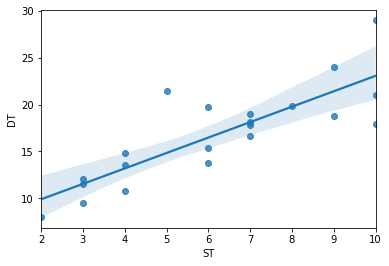

In [24]:
sns.regplot(data.ST,data.DT)

In [25]:
model1.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [27]:
model1.predict()

array([23.07293294, 13.17881356, 16.47685335, 21.42391304, 23.07293294,
       16.47685335, 18.12587325, 11.52979366, 23.07293294, 21.42391304,
       19.77489315, 13.17881356, 18.12587325, 11.52979366, 11.52979366,
       13.17881356, 16.47685335, 18.12587325,  9.88077377, 18.12587325,
       14.82783346])

In [28]:
predict1=model1.predict()

In [29]:
rmse1=np.sqrt(np.mean((np.array([data.DT])-np.array(predict1))**2))
rmse1

2.7916503270617654

#### Here from above OLS regression results R-Squared value is 0.682 which is not greater than 0.85 hence we cannot say this model1 is good for predict  Delivery TIme.

### Developing another by using log function

### MODEL - 2

In [34]:
model2=smf.ols('DT~np.log(ST)',data=data).fit()

In [35]:
model2.params

Intercept     1.159684
np.log(ST)    9.043413
dtype: float64

In [36]:
model2.rsquared 

0.6954434611324223

In [37]:
model2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 31 May 2021   Prob (F-statistic):           2.64e-06
Time:                        08:33:43   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(ST)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
predict2=model2.predict()
predict2


array([21.98291253, 13.69651659, 17.36330521, 21.03009382, 21.98291253,
       17.36330521, 18.75735354, 11.09488867, 21.98291253, 21.03009382,
       19.96493314, 13.69651659, 18.75735354, 11.09488867, 11.09488867,
       13.69651659, 17.36330521, 18.75735354,  7.42810005, 18.75735354,
       15.71449599])

In [41]:
rmse2=np.sqrt(np.mean((np.array([data.DT])-np.array(predict2))**2))
rmse2

2.733171476682066

#### Here from above OLS regression results R-Squared value is 0.695 which is not greater than 0.85 hence we cannot say this model1 is good for predict  Delivery TIme.

### MODEL - 3

In [42]:
model3 = smf.ols('np.log(DT)~ST', data = data).fit()

In [44]:
model3.params

Intercept    2.121372
ST           0.105552
dtype: float64

In [45]:
model3.rsquared 

0.7109478980584187

In [49]:
model3.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Mon, 31 May 2021   Prob (F-statistic):           1.59e-06
Time:                        08:48:05   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
ST             0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
predict3=model3.predict()
predict3

array([3.17688783, 2.54357825, 2.75468144, 3.07133624, 3.17688783,
       2.75468144, 2.86023304, 2.43802665, 3.17688783, 3.07133624,
       2.96578464, 2.54357825, 2.86023304, 2.43802665, 2.43802665,
       2.54357825, 2.75468144, 2.86023304, 2.33247505, 2.86023304,
       2.64912984])

In [51]:
rmse3=np.sqrt(np.mean((np.array([data.DT])-np.array(predict3))**2))
rmse3

14.795516941016686

### MODEL- 4

In [52]:
model4 = smf.ols('DT~np.sqrt(ST)', data = data).fit()

In [53]:
model4.params

Intercept     -2.518837
np.sqrt(ST)    7.936591
dtype: float64

In [54]:
model4.rsquared 

0.6958062276308671

In [55]:
model4.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Mon, 31 May 2021   Prob (F-statistic):           2.61e-06
Time:                        08:55:12   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(ST)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
predict4=model4.predict()
predict4

array([22.57886702, 13.35434489, 16.92176102, 21.29093564, 22.57886702,
       16.92176102, 18.47940877, 11.22774181, 22.57886702, 21.29093564,
       19.92923195, 13.35434489, 18.47940877, 11.22774181, 11.22774181,
       13.35434489, 16.92176102, 18.47940877,  8.70519766, 18.47940877,
       15.22791982])

In [57]:
rmse4=np.sqrt(np.mean((np.array([data.DT])-np.array(predict4))**2))
rmse4

2.7315432100912105



### Conclusion- Comparing between all models , model3 has higher R-squared value i.e. 0.711 as comapare to others. 

#### From the above data we know higher R-squred value and lower RMSE value gives better model.

# Hence the model3 is better model to predict delivery_time